In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel
import keras

pd.options.display.max_columns = None
pd.options.display.max_rows = None

warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/")

Using TensorFlow backend.
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

Read the new DataFrame

In [2]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("MoreCategoriesData.csv")  

In [3]:
df.head()

,Date,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tolls,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6,ScaledStartTime,ScaledDayofWeek,TrafficCategory
0,01-01-2019,0,1,22,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.661325,-0.974781,1
1,01-01-2019,1,2,29,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.516862,-0.974781,1
2,01-01-2019,2,3,25,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.372399,-0.974781,1
3,01-01-2019,3,4,31,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.227936,-0.974781,1
4,01-01-2019,4,5,24,2,0,1,-1.552307,-1.676356,2019,M7-M8,0,0,0,0,0,0,0,1,0,0,0,-1.083473,-0.974781,1


In [70]:
# Quartiles
tolls = df["Tolls"].unique()
for toll in tolls:
    print(toll)
    quants = df[df["Tolls"] == toll]["No_of_Cars"].quantile([0.17, 0.34, 0.51, 0.67, 0.84])
    print(quants)
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]<=quants[0.17]),"TrafficCategory"] = 1
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.17]) & (df["No_of_Cars"]<=quants[0.34]),"TrafficCategory"] = 2
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.34]) & (df["No_of_Cars"]<=quants[0.51]),"TrafficCategory"] = 3
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.51]) & (df["No_of_Cars"]<=quants[0.67]),"TrafficCategory"] = 4
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.67]) & (df["No_of_Cars"]<=quants[0.84]),"TrafficCategory"] = 5
    df.loc[(df["Tolls"]==toll) & (df["No_of_Cars"]>quants[0.84]),"TrafficCategory"] = 6

M7-M8
0.17     77.00
0.34    144.00
0.51    533.00
0.67    727.00
0.84    914.84
Name: No_of_Cars, dtype: float64
N6
0.17     31.0
0.34     65.0
0.51    267.0
0.67    381.0
0.84    481.0
Name: No_of_Cars, dtype: float64
N25
0.17     11.0
0.34     34.0
0.51    138.0
0.67    268.0
0.84    357.0
Name: No_of_Cars, dtype: float64
M50
0.17     195.00
0.34     480.00
0.51    1391.73
0.67    2664.00
0.84    3295.32
Name: No_of_Cars, dtype: float64
M1
0.17      87.00
0.34     214.00
0.51     857.35
0.67    1265.00
0.84    1767.80
Name: No_of_Cars, dtype: float64
M8
0.17      0.00
0.34     44.00
0.51     83.00
0.67    382.85
0.84    571.00
Name: No_of_Cars, dtype: float64
M3
0.17      57.00
0.34     147.00
0.51     726.57
0.67    1125.00
0.84    1727.40
Name: No_of_Cars, dtype: float64
Eastlink
0.17     25.00
0.34    136.00
0.51    449.00
0.67    709.00
0.84    942.16
Name: No_of_Cars, dtype: float64
M4
0.17      38.00
0.34     112.00
0.51     540.49
0.67     901.00
0.84    1176.16
Name: No_of_C

### MODEL

In [71]:
df = df[:90888]

In [72]:

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

df_x = df.drop(["Date","StartTime","EndTime","No_of_Cars","DayOfWeek","Weekend?","Year", "Tolls","TrafficCategory"],axis=1)
df_y = df["TrafficCategory"]

encoder = LabelEncoder()
encoder.fit(df_y)
df_y = encoder.transform(df_y)
df_y = keras.utils.to_categorical(df_y)

In [73]:
df_x.head()

,isHoliday?,Month,Day,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6,ScaledStartTime,ScaledDayofWeek
0,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.661325,-0.974781
1,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.516862,-0.974781
2,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.372399,-0.974781
3,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.227936,-0.974781
4,1,-1.552307,-1.676356,0,0,0,0,0,0,0,1,0,0,0,-1.083473,-0.974781


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.80, random_state=46)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(72710, 16)
(72710, 6)
(18178, 16)
(18178, 6)


In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [77]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [78]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(6, activation='softmax')
    ])
    epochs = 100
    learning_rate = 0.001
    decay_rate = learning_rate / epochs
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = keras.optimizers.SGD(learning_rate=0.001)
    #opt = keras.optimizers.RMSprop(learning_rate=learning_rate, decay=decay_rate) #momentum=momentum

    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    return model

In [79]:
model = build_model()

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 102       
Total params: 6,390
Trainable params: 6,390
Non-trainable params: 0
_________________________________________________________________


In [81]:
EPOCHS = 10
early_stop = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10)

history4 = model.fit(  x_train.values, y_train,# batch_size=10,
                      epochs=EPOCHS, 
                      #validation_split = 0.20, 
                      verbose=1,
                      callbacks=[early_stop],
                      validation_data=(x_test.values, y_test)
                   )

Train on 72710 samples, validate on 18178 samples
Epoch 1/10
72710/72710 [==============================] - 6s 85us/sample - loss: 0.9914 - acc: 0.6148 - val_loss: 0.7730 - val_acc: 0.7098
Epoch 2/10
72710/72710 [==============================] - 5s 70us/sample - loss: 0.6976 - acc: 0.7341 - val_loss: 0.6396 - val_acc: 0.7615
Epoch 3/10
72710/72710 [==============================] - 5s 70us/sample - loss: 0.6020 - acc: 0.7743 - val_loss: 0.5653 - val_acc: 0.7904
Epoch 4/10
72710/72710 [==============================] - 5s 70us/sample - loss: 0.5523 - acc: 0.7922 - val_loss: 0.5225 - val_acc: 0.8008
Epoch 5/10
72710/72710 [==============================] - 5s 70us/sample - loss: 0.5217 - acc: 0.8011 - val_loss: 0.5166 - val_acc: 0.8043
Epoch 6/10
72710/72710 [==============================] - 5s 70us/sample - loss: 0.5036 - acc: 0.8099 - val_loss: 0.4915 - val_acc: 0.8145
Epoch 7/10
72710/72710 [==============================] - 5s 71us/sample - loss: 0.4871 - acc: 0.8148 - val_loss: 0.

In [82]:
model.evaluate(x_test, y_test)[1] * 100 


18178/18178 [==============================] - 1s 37us/sample - loss: 0.4456 - acc: 0.8323


83.22697877883911

In [83]:
hist4 = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch
hist4 #.tail()

,loss,acc,val_loss,val_acc,epoch
0,0.991398,0.614826,0.772972,0.709814,0
1,0.697644,0.734053,0.639612,0.761525,1
2,0.601992,0.774309,0.565296,0.790406,2
3,0.552295,0.792243,0.522498,0.800803,3
4,0.521701,0.801100,0.516565,0.804269,4
5,0.503569,0.809875,0.491462,0.814501,5
6,0.487057,0.814771,0.491739,0.817087,6
7,0.475319,0.819873,0.480672,0.810540,7
8,0.468213,0.821139,0.458492,0.825998,8
9,0.460015,0.823491,0.445559,0.832270,9


In [84]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=0)

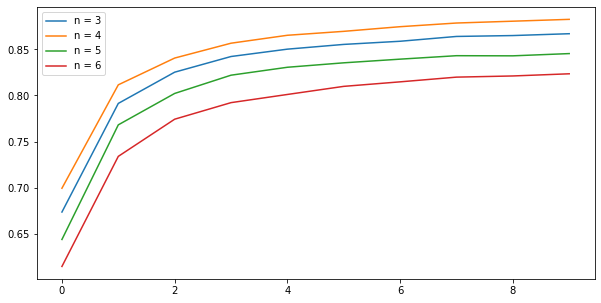

In [85]:
plt.figure(figsize=(10,5))
#plt.plot(hist1["acc"], label="RMSProp Test")
#plt.plot(hist1["val_acc"], linestyle='dashed', label="RMSProp Validation")

plt.plot(hist1["acc"], label="n = 3")
plt.plot(hist2["acc"], label="n = 4")
plt.plot(hist3["acc"], label="n = 5")
plt.plot(hist4["acc"], label="n = 6")

#plt.plot(hist3["acc"], label="SGD Test")
#plt.plot(hist3["val_acc"], linestyle='dashed', label="SGD Validation")

#plt.plot(hist3["acc"], label="SGD LR-0.001")
#plt.plot(hist4["acc"], label="Adam LR-0.005")


#plt.plot(data[0].head(500), label="Predicted")
plt.legend(loc="top right")
plt.show()

Text(0, 0.5, 'Accuracy')

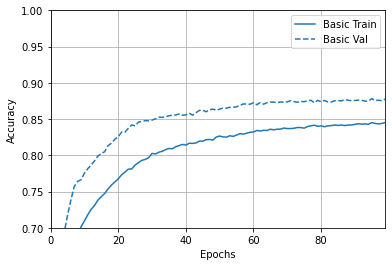

In [250]:
plotter.plot({'Basic': history}, metric = "acc")
plt.ylim([0.7, 1])
plt.ylabel('Accuracy')

In [ ]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

In [ ]:
ypred = model.predict(x_test)

In [145]:
data = pd.DataFrame(ypred, y_test).reset_index()

ValueError: Index data must be 1-dimensional

In [146]:
plt.figure(figsize=(20,8))
plt.plot(data["No_of_Cars"].head(100), label="Actual")
plt.plot(data[0].head(100), label="Predicted")
plt.legend(loc="upper right")
plt.show()

NameError: name 'data' is not defined

<Figure size 1440x576 with 0 Axes>

In [ ]:
test = pd.DataFrame(y_test)
pred = pd.DataFrame(ypred)
final = pd.concat([test, pred], axis=1)
test.to_csv("test.csv")
pred.to_csv("pred.csv")
# manually merge the CSVs

In [ ]:
data = pd.read_csv("test.csv")
data = data.set_index('Index')


In [ ]:
merged = pd.merge(left=df, left_index=True,
                  right=data, right_index=True,
                  how='inner')

In [ ]:
merged.head()

In [ ]:
final = merged[["Date","Tolls","StartTime","DayOfWeek","isHoliday?","No_of_Cars_y","Predicted"]]

final["Inaccuracy"] = abs(final["No_of_Cars_y"] - final["Predicted"])
final["Precision"] = final["Inaccuracy"]/final["No_of_Cars_y"]

final = final.sort_values("Precision", ascending=False)

#final[(final["Precision"]>1) & (final["No_of_Cars_y"]>10)]

In [ ]:
final.head()

In [ ]:
final.to_csv("RF_Predictions.csv", index=False)
#del(final)
del(test)
del(merged)
del(pred)
del(data)

In [184]:
del(history3)

In [224]:
hist2

,loss,acc,val_loss,val_acc,epoch
0,0.707853,0.708788,0.536243,0.791451,0
1,0.473781,0.820932,0.437921,0.834965,1
2,0.407943,0.847696,0.371940,0.865717,2
3,0.372802,0.862715,0.346407,0.872978,3
4,0.348497,0.870444,0.361395,0.860161,4
5,0.334757,0.874254,0.321596,0.881395,5
6,0.323388,0.879384,0.327055,0.874079,6
7,0.316999,0.881296,0.309900,0.884586,7
8,0.309637,0.884046,0.313670,0.879690,8
9,0.304457,0.886027,0.311545,0.882440,9
